## Rotating edge experiment

In [1]:
from lineart.transforms import rotate, rotate_xy, sample_line
import numpy as np
from IPython.display import Image
from flat import rgba, font, shape, strike, document
import lineart.style as style

In [2]:
e = np.array([
    [0,0,0],
    [1,1,0]
])
p = np.array([0,1,0])
o = np.array([0,0,0])
edges = np.array([e,e,e])
points = np.array([p,p])

In [3]:
rotate_xy(edges, 0, np.pi/2)

array([[[ 0.,  0.,  0.],
        [ 1., -1.,  0.]],

       [[ 0.,  0.,  0.],
        [ 1., -1.,  0.]],

       [[ 0.,  0.,  0.],
        [ 1., -1.,  0.]]])

In [4]:
edges.shape


(3, 2, 3)

## split edges

In [86]:
def draw_edges(edges, image_size=100, v=False):
    
    edges = edges.reshape(-1,2,3)[:,:,:-1]
    # page setup
    d = document(image_size, image_size, 'mm')
    page = d.addpage()
    page.place(style.background.rectangle(0,0,image_size,image_size))
    for e in edges:
        page.place(style.edge.line(*e.flatten()))
    if v:
        for p in edges.reshape(-1,2):
            page.place(style.debug.circle(*p, 2))
        
    return (page.image(kind='rgba', ppi=60).png())

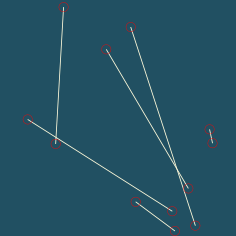

In [87]:
edges = np.random.rand(6,2,3)*100
Image(draw_edges(edges, v=True))

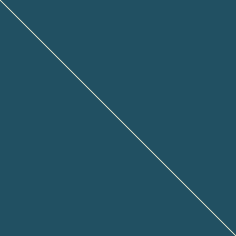

In [88]:
Image(draw_edges(e*100))

In [169]:
def split(e, n):
    fracs = np.random.rand(n, 1)
    fracs.sort(axis=0)
    vector = e[1] - e[0]
    splits = np.multiply(fracs[::-1], vector) + e[0]
    points = np.concatenate((e[1].reshape(1,3),splits,e[0].reshape(1,3)))
    starts = points[:-1]
    ends = points[1:]
    edges = np.concatenate((starts.reshape(-1,1,3),ends.reshape(-1,1,3)),axis=1)
    return edges

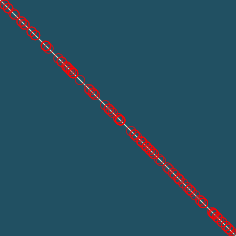

In [170]:
splits = split(e*100,100)

Image(draw_edges(splits, v=True))

In [171]:
class EdgeCollection:
    def __init__(self, edges, velocities):
        self.edges = edges
        self.velocities = velocities
    def move(self, t):
        self.edges = self.edges + t*np.repeat(self.velocities[:,np.newaxis, :], 2, axis=1)

In [172]:
split_collection = EdgeCollection(splits, np.random.randn(*splits[:,0,:].shape))

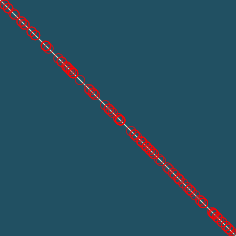

In [174]:
Image(draw_edges(split_collection.edges, v=True))

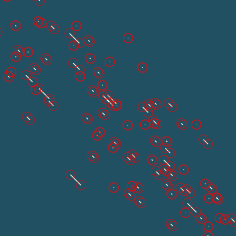

In [186]:
split_collection.move(1)
Image(draw_edges(split_collection.edges, v=True))

array([[0.65079556],
       [0.60742279],
       [0.38468355],
       [0.49939096],
       [0.35547408],
       [0.40376855],
       [0.07700422],
       [0.8415768 ],
       [0.88750774],
       [0.076683  ]])